In [1]:
import numpy as np
import matplotlib.pyplot as pp

# Função auxiliar

A função abaixo constrói gráficos ilustrativos do método da secante. Você pode ler o código para tentar aprender alguns comandos de criação de gráficos do Python, mas não precisa estudar como parte da disciplina.

In [2]:
def ilustra_secante( f, x, interval = None, delta = 2, npoints = 100, root = None, k = 0 ):
    
    c = ( x[ 0 ] + x[ 1 ] ) / 2
    if interval is None:
        interval = ( c - delta / 2, c + delta / 2 )
        
    ( a, b ) = interval
        
    X = np.linspace( a, b, npoints )
    Y = f( X )
    
    # Eixo x:
    pp.plot( [ X.min(), X.max() ], [ 0, 0 ], 'k' )
    # Função
    try:
        pp.plot( X, Y, color = pp.gca().lines[ 1 ].get_color() )
    except:
        pp.plot( X, Y )
    
    # Raiz:
    if not root is None:
        pp.scatter( root, f( root ), color = pp.gca().lines[ 1 ].get_color(), zorder = 10 )

    # Pontos atuais
    pp.scatter( x[ 0 ], f( x[ 0 ] ), color = pp.gca().lines[ 1 ].get_color(), zorder = 10 )
    pp.annotate(
        "$x_{%d}$" % ( k, ),
        ( x[ 0 ], 0 ),
        textcoords = "offset points",
        xytext = ( -4, -15 )
    )
    pp.scatter( x[ 1 ], f( x[ 1 ] ), color = pp.gca().lines[ 1 ].get_color(), zorder = 10 )
    pp.annotate(
        "$x_{%d}$" % ( k + 1, ),
        ( x[ 1 ], 0 ),
        textcoords = "offset points",
        xytext = ( -4, -15 )
    )
    pp.scatter( x[ 0 ], 0, color = 'k', zorder = 10 )
    pp.scatter( x[ 1 ], 0, color = 'k', zorder = 10 )
    pp.plot( [ x[ 0 ], x[ 0 ] ], [ 0, f( x[ 0 ] ) ], 'k:' )
    pp.plot( [ x[ 1 ], x[ 1 ] ], [ 0, f( x[ 1 ] ) ], 'k:' )
    
    # Reta secante:
    slope = ( f( x[ 0 ] ) - f( x[ 1 ] ) ) / ( x[ 0 ] - x[ 1 ] )
    pp.plot( X, ( X - x[ 0 ] ) * slope + f( x[ 0 ] ) )
   
    # Próxima iteração
    x_next = x[ 1 ] - f( x[ 1 ] ) / slope
    pp.scatter( x_next, 0, color = pp.gca().lines[ -1 ].get_color(), zorder = 10 )
    pp.annotate(
        "$x_{%d}$" % ( k + 2, ),
        ( x_next, 0 ),
        textcoords = "offset points",
        xytext = ( -4, -15 )
    )

    # Configuração dos eixos:
    pp.axis( 'equal' )
    
    tmp = ( Y.max() - Y.min() ) * 0.05
    pp.axis( ( X.min(), X.max(), Y.min() - tmp, Y.max() + tmp ) )
    
    return ( x[ 1 ], x_next )

pp.rc( 'text', usetex = True )
pp.rc( 'font', size = 20, family = 'serif' )
# points = ilustra_secante( np.sin, ( 0.8, 0.6 ), interval = ( -0.5, 1.5 ), root = 0 )
# pp.figure()
# points = ilustra_secante( np.sin, points, interval = ( -0.5, 1.5 ), root = 0, k = 1 )
# ilustra_secante( np.sin, ( 0.8, 0.7 ), interval = ( 0.85, 0.65 ), root = 0 )
# pp.show()

# Método da Secante

Assim como o método de Newton, o método da secante tenta resolver o problema
$$\large
f( x^* ) = 0
$$
substituindo a função $f$ por uma aproximação linear para ela.

Dadas duas aproximação iniciaisl $x_{k - 1}$ e $x_{k}$, atualizaremos a aproximação para $x_{k + 1}$ calculando o ponto onde reta determinada pelos pontos $\bigl( x_k, f( x_k ) \bigr)$ e $\bigl( x_{k - 1}, f( x_{k - 1} ) \bigr)$ cruza o eixo horizontal.

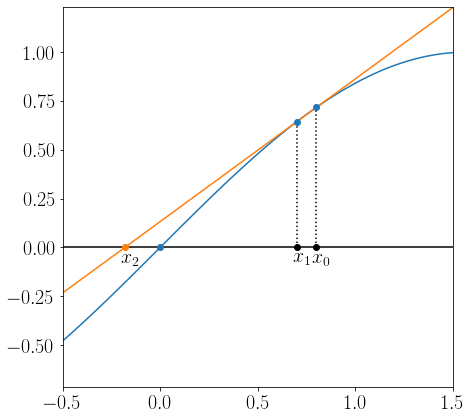

In [3]:
pp.rc( 'text', usetex = True )
pp.rc( 'font', size = 20, family = 'serif' )

pp.figure( figsize = ( 7, 7 ) )
points = ilustra_secante( np.sin, ( 0.8, 0.7 ), interval = ( -0.5, 1.5 ), root = 0 )
#points = ilustra_secante( np.sin, points, interval = ( -0.5, 1.5 ), root = 0, k = 1 )
#ilustra_secante( np.sin, ( 0.8, 0.7 ), interval = ( 0.65, 0.85 ), root = 0 )
pp.show()

Observando a figura, vemos que

$$\large
( x_{k} - x_{k + 1} )\tan\alpha = f( x_{k} ).
$$
Manipulando obtemos

$$\large
x_k - x_{k + 1} = \frac{f( x_k )}{\tan\alpha}
$$

Mas
$$\large
\tan\alpha = \frac{ f( x_{k} ) - f( x_{k - 1} ) }{x_{k} - x_{k - 1}},
$$
logo

$$\large
x_{k + 1} = x_k - f( x_k )\frac{x_{k} - x_{k - 1}}{f( x_{k} ) - f( x_{k - 1} )}
$$

## Observações

1. O método da secante não requer derivadas, ao invés disso ele utiliza uma aproximação da forma
$$\large
f'( x_k ) \approx \frac{ f( x_{k} ) - f( x_{k - 1} ) }{x_{k} - x_{k - 1}}
$$
2. O método da secante requer dois pontos para sua inicialização
3. Apenas uma avaliação de função é necessária a cada iteração

# Convergência do Método da Secante

**Teorema** Seja $f : \mathbb R \to \mathbb R$ duas vezes continuamente diferenciável. Suponha que $f( x^* ) = 0$, $f'( x^* ) \neq 0$ e que $x_0$ e $x_1$ estejam suficientemente próximos de $x^*$. Então a sequência $\{ x_k \}$ gerada pelo Método de Newton satisfaz

$$\large
\lim_{k \to \infty}x_k = x^*
$$
e
$$\large
\lim_{k \to \infty} \frac{| x_{k + 1} - x^* |}{| x_k - x^* |^{\frac{1 + \sqrt{5}}{2}}} = \left|\frac{f''( x^* )}{2f'( x^* )}\right|^{\frac{\sqrt{5} - 1}{2}}.
$$

In [4]:
print( (1 + 5 ** 0.5 ) / 2 )

1.618033988749895


In [5]:
def secante( f, x, tol = 1e-10, return_niter = False ):
    
    niter = 0
    
    ( x_0, x_1 ) = x
    
    f_x_0 = f( x_0 )
    f_x_1 = f( x_1 )
    
    stop_iter = False
    
    while not stop_iter:
        
        niter = niter + 1

        x_next = x_1 - f_x_1 * ( x_1 - x_0 ) / ( f_x_1 - f_x_0 )
    
        f_x_0 = f_x_1
        x_0 = x_1

        f_x_1 = f( x_next )
        x_1 = x_next

        stop_iter = ( abs( x_1 - x_0 ) <= tol )        
        
    if return_niter:
        return ( x_1, niter )
    else:
        return x_1

In [6]:
L = 2
r = 0.25

V = 0.1

def F( h ):
    res = ( r ** 2 ) * np.arcsin( ( h - r ) / r )
    res += r * ( h - r ) * np.sqrt( 1 - ( ( h - r ) / r ) ** 2 )
    
    return res

def f_cocho( h ):
    
    return L * ( F( h ) - F( 0 ) ) - V

def df_cocho( h ):
    
    return 2 * L * np.sqrt( r ** 2 - ( h - r ) ** 2 )

In [7]:
( h_secante, niter_secante ) = secante( f_cocho,( 0.1, 0.11 ), tol = 1e-14, return_niter = True )
print( h_secante, niter_secante )

0.1509982981816477 6


In [8]:
def newton( f, df, x, tol = 1e-10, return_niter = False ):
    
    niter = 1
    
    x_pre = x
    x = x - f( x ) / df( x )
    
    while abs( x - x_pre ) > tol:
        
        x_pre = x
        x = x - f( x ) / df( x )
        
        niter = niter + 1
        
    if return_niter:
        return ( x, niter )
    else:
        return x

In [9]:
( h_newton, niter_newton ) = newton( f_cocho, df_cocho, 0.1, tol = 1e-14, return_niter = True )
print( h_newton, 2 * niter_newton )

0.1509982981816477 10


# Brincando com as hipóteses

Como o Método de Newton se comporta se alguma das hipóteses do teorema de convergência não for satisfeita. Ou seja, se:

1. Não existir uma raiz $x^*$ tal que $f( x^* ) = 0$
2. $f'( x^* ) = 0$
3. $x_0$ está distante de $x^*$

In [10]:
# Exemplo: tentando encontrar uma raiz que não existe

( x, niter ) = secante( np.exp, ( 0, 0.01 ), return_niter = True )
print( x, niter )
np.exp( x )

-745.8612480821154 1076


0.0

$$\large
e = \lim_{h \to \infty}\left( 1 + \frac1h \right)^h
$$

In [11]:
def f( x ):
    
    return np.cos( x ) + 1.0

def df( x ):
    
    return -np.sin( x )

# Exemplo: tentando encontrar uma raiz múltipla ( f'( x^* ) = 0 )

( x, niter ) = secante( f, ( 3.1, 3.11 ), return_niter = True )
print( x - np.pi, niter )

-9.823419411247869e-09 32


(0.0, 5.0, -0.25, 0.25)

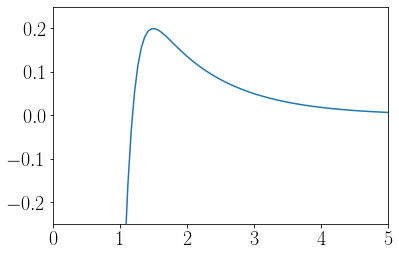

In [12]:
x = np.linspace( 0, 5, 100 )
def f( x ):
    
    return np.exp( -x ) - 20 * np.exp( -3 * x ** 2 )

def df( x ):
    
    return -np.exp( -x ) + 120 * x * np.exp( -3 * x ** 2 )

pp.plot( x, f( x ) )
#pp.plot( x, df( x ) )
pp.axis( ( x.min(), x.max(), -0.25, 0.25 ) )

In [13]:
# Começando "bem"

( x, niter ) = secante( f, ( 1.0, 1.01 ), return_niter = True )
print( x, niter )

1.1797585688629948 8


In [14]:
# Começando "mal"

( x, niter ) = secante( f, ( 1.5, 1.51 ), return_niter = True )
print( x, niter )

745.8841702200997 1061


In [15]:
# Funcionando "bem demais"

( x, niter ) = secante( np.sin, ( 3.1, 3.11 ), return_niter = True )
print( x - np.pi, niter )

# Exercício: encontre outros exemplos em que isso ocorra

0.0 4
